In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.preprocessing import prepare_data, mcar_removal
from src.model_code import MH_regression, Gibbs_regression, running_mean
from src.diagnostics import MCMC_diagnostics

In [3]:
df = pd.read_csv('../student/student-mat.csv', sep=";")
features, target = prepare_data(df)

In [4]:
new_features = mcar_removal(features, 0.05)
new_features.dropna(inplace=True)
new_target = target[new_features.index].copy()
betas, sigmas = Gibbs_regression(new_features, new_target, B=20000)
thinned_betas = betas[:,::10]
results = pd.DataFrame(thinned_betas.T, columns = features.columns)

removing 19 entries for both features


AttributeError: module 'pymc3' has no attribute 'geweke'

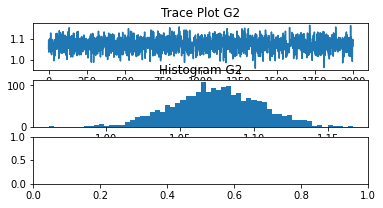

In [5]:
MCMC_diagnostics(results['G2'], 'G2')

In [ ]:
for prop in [0.05, 0.1, 0.25, 0.5]:
    new_features = mcar_removal(features, prop)
    new_features.dropna(inplace=True)
    new_target = target[new_features.index].copy()
    betas, sigmas = Gibbs_regression(new_features, new_target, B=20000)
    thinned_betas = betas[:,::10]
    results = pd.DataFrame(thinned_betas.T, columns = features.columns)
    results.to_csv(f'results/02_dists_{prop}.csv', index=False)